# Sci-kit Learn Basics

## import numpy

In [2]:
import numpy as np

## Prepocessing Data

### Import `preprocessing`

In [3]:
from sklearn import preprocessing 

### Binarization

In [4]:
input_data = np.array([[5.1, -2.9, 3.3], 
                       [-1.2, 7.8, -6.1], 
                       [3.9, 0.4, 2.1], 
                       [7.3, -9.9, -4.5]]) 
# Binarize data  
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data) 
print("\nBinarized data:\n", data_binarized) 


Binarized data:
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


`preprocessing.Binarizer(threshold=2.1).transform(input_data)` passes all the elements in the array `input_data` into the function $$f(x) = \begin{cases} 1.0 \text{ if } x \geq 2.1 \\ 0.0 \text{ otherwise}  \end{cases}$$

### Normalization

In [5]:
input_data = np.array([[5.1, -2.9, 3.3], 
                       [-1.2, 7.8, -6.1], 
                       [3.9, 0.4, 2.1], 
                       [7.3, -9.9, -4.5]]) 
# Print mean and standard deviation 
print("\nBEFORE:") 
print("Mean =", input_data.mean(axis=0)) 
print("Std deviation =", input_data.std(axis=0)) 

print("\n Before Normalizaion: \n", input_data)

# Remove mean 
data_scaled = preprocessing.scale(input_data) 
print("\nAFTER:") 
print("Mean =", data_scaled.mean(axis=0)) 
print("Std deviation =", data_scaled.std(axis=0)) 

print("\nNormalized data: \n",data_scaled)


BEFORE:
Mean = [ 3.775 -1.15  -1.3  ]
Std deviation = [3.12039661 6.36651396 4.0620192 ]

 Before Normalizaion: 
 [[ 5.1 -2.9  3.3]
 [-1.2  7.8 -6.1]
 [ 3.9  0.4  2.1]
 [ 7.3 -9.9 -4.5]]

AFTER:
Mean = [1.11022302e-16 0.00000000e+00 2.77555756e-17]
Std deviation = [1. 1. 1.]

Normalized data: 
 [[ 0.42462551 -0.2748757   1.13244172]
 [-1.59434861  1.40579288 -1.18167831]
 [ 0.04005901  0.24346134  0.83702214]
 [ 1.12966409 -1.37437851 -0.78778554]]


In [6]:
## numpy equivalence
mean = np.mean(input_data, axis= 0)
sd = np.std(input_data, axis=0)

processed = (input_data - mean)/(sd)
print("Mean =", processed.mean(axis=0)) 
print("Std deviation =", processed.std(axis=0)) 
print("\nNormalized data: \n",processed)

Mean = [1.11022302e-16 0.00000000e+00 2.77555756e-17]
Std deviation = [1. 1. 1.]

Normalized data: 
 [[ 0.42462551 -0.2748757   1.13244172]
 [-1.59434861  1.40579288 -1.18167831]
 [ 0.04005901  0.24346134  0.83702214]
 [ 1.12966409 -1.37437851 -0.78778554]]


## Label encoding

### Import `preprocessing`

In [7]:
from sklearn import preprocessing

### Define some sample labels

In [8]:
input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white'] 

### Create the label encoder object and train it

In [9]:
# Create label encoder and fit the labels 
encoder = preprocessing.LabelEncoder() 
encoder.fit(input_labels) 

LabelEncoder()

### Print the mapping between words and numbers

In [10]:
# Print the mapping  
print("\nLabel mapping:") 
for i, item in enumerate(encoder.classes_): 
    print(item, '-->', i) 



Label mapping:
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4


### Encode a set of randomly ordered labels to see how it performs

In [16]:
# Encode a set of labels using the encoder
test_labels = ["green", "red", "black"]
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels)
print("Encoded values =", encoded_values)


Labels = ['green', 'red', 'black']
Encoded values = [1 2 0]


### Decode a random set of numbers

In [23]:
encoded_values = np.random.randint(0, 5, size=10)
print("\nLabels =", encoded_values)
print("Encode values =", encoder.inverse_transform(encoded_values))


Labels = [4 2 1 1 1 1 2 3 0 3]
Encode values = ['yellow' 'red' 'green' 'green' 'green' 'green' 'red' 'white' 'black'
 'white']


# Logistic Regression Classifier

*Logistic regression* is a technique that is used to explain the relationship between input variables and output variables. Here are some assumptions we will make about the classifier:
* input variables are assumed to be independent
* output variable is refered to as the dependent variable
* the dependent variable can take only a fixed set of values
* these values correspond to the classes of the classification problem

Our goal is to identify the relationship between the independent variables and the dependent variables by estimating the probabilities using a logistic function. This logistic function is a sigmoid curve $f(x) = \frac{1}{1+ e^{-x}}$ that's used to build the function with various parameters.

*Remark*: it is very closely related to generalized linear model analysis, where we try to fit a line  to a brunch of points to minimize the error. Instead of using linear regression, we use logistic regression. 

### Import all the required modules

In [36]:
from sklearn import linear_model 
import matplotlib.pyplot as plt 

### Define visualize_classifier()

In [38]:
def visualize_classifier(classifier, X, y): 
    # Define the minimum and maximum values for X and Y 
    # that will be used in the mesh grid 
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0 
    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01 
 
    # Define the mesh grid of X and Y values 
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size)) 

    # Run the classifier on the mesh grid 
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()]) 
 
    # Reshape the output array 
    output = output.reshape(x_vals.shape) 

    # Create a plot 
    plt.figure() 
 
    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray) 
 
    # Overlay the training points on the plot  
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot 
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max()) 
 
    # Specify the ticks on the X and Y axes 
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0))) 
 
    plt.show() 

### Define sample input data with two-dimensional vectors and corresponding lables

In [29]:
# Define sample input data 
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]]) 
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]) 

### Create the logistic regression classifier object

In [40]:
# Create the logistic regression classifier 
classifier = linear_model.LogisticRegression(solver='liblinear', C=100) 

### Train the classifier using the data

In [41]:
# Train the classifier 
classifier.fit(X, y) 

LogisticRegression(C=100, solver='liblinear')

### Visualize the performance of the classifier

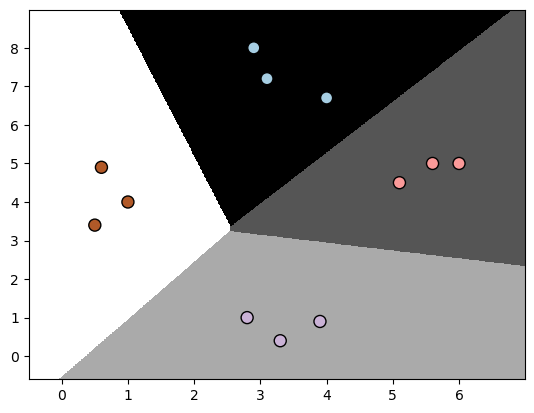

In [43]:
visualize_classifier(classifier, X, y)